In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import csv
cf_data = []
with open('/content/combined_cf_data.csv', 'r') as f:
    reader = csv.reader(f)
    i = 0
    for line in reader:
      if (i > 90):
        break
      i += 1
      cf_data.append(line)
for row in cf_data[1:]:
  for i in range(len(row)):
    row[i] = int(row[i])

In [ ]:
trainIndices, valIndices, testIndices = [], [], []
for i in range(1, 91):
  if ((i-1) % 30 <= 20):
    trainIndices.append(i)
  elif ((i-1) % 30 <= 24):
    valIndices.append(i)
  else:
    testIndices.append(i)

In [ ]:
trainData, valData, testData = [], [], []
trainLabels, valLabels, testLabels = [], [], []
for num in trainIndices:
  trainData.append(cf_data[num][1:8])
  trainLabels.append(cf_data[num][8])
for num in valIndices:
  valData.append(cf_data[num][1:8])
  valLabels.append(cf_data[num][8])
for num in testIndices:
  testData.append(cf_data[num][1:8])
  testLabels.append(cf_data[num][8])
trainData = tf.convert_to_tensor(trainData)
valData = tf.convert_to_tensor(valData)
testData = tf.convert_to_tensor(testData)
trainLabels = tf.keras.utils.to_categorical(trainLabels)
valLabels = tf.keras.utils.to_categorical(valLabels)
testLabelsN = tf.keras.utils.to_categorical(testLabels)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(trainData, trainLabels, epochs=70, validation_data=(valData, valLabels))

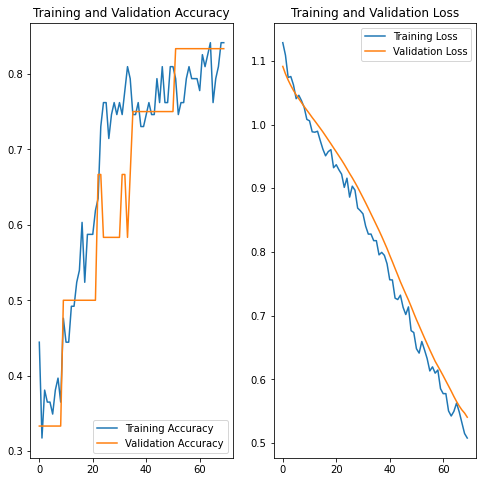

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(70)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
testPredictions = model.predict(testData)
testPredictionLabels = []
testAccuracy = 0
for i in range(len(testPredictions)):
  testPredictionLabels.append(np.argmax(testPredictions[i]))
  if (testPredictionLabels[i] == testLabels[i]):
    testAccuracy += 1
print(testAccuracy/len(testPredictionLabels))
confusion_mtx = tf.math.confusion_matrix(testLabels, testPredictionLabels, 3)
print(confusion_mtx)